In [ ]:
for tweet in tweepy.Cursor(api.search, q='#yoursearch',result_type='popular').items(5):
    print(tweet)

In [104]:
import os
import sys
import json
import time
import math
from tweepy import Cursor
import tweepy
from tweepy import OAuthHandler
from datetime import datetime
from datetime import date

#Variables that contains the user credentials to access Twitter API
access_token = "4411474994-3fGhUuDAvjL1X5SBoat5fA7nTCNuf0t4lsjpaUE"
access_token_secret = "JMoaE8YUXLR7yQqplHipzr07xW0Bhb2iYe46NkHwYRVAJ"
consumer_key = "uAk8Uas7X9JUh3DNTpNIxd5OX"
consumer_secret = "MYfrcCuGerViS8zMzHQZeSwEfa3Nd00x9dvd1N1AZZNLYQ2boW"

# authentication
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [102]:
if __name__ == '__main__':
    profile_dominos = 'data/dominos_profile.json'
    profile_lc = 'data/littlecaesars_profile.json'
    profile_pj = 'data/papajohns_profile.json'
    profile_cpk = 'data/calpizzakitchen_profile.json'
    profile_pizzahut = 'data/pizzahut_profile.json'
    
    dominos = []
    pizzahut = []    
    lc = []
    pj = []
    cpk = []
    
    with open(profile_dominos) as f1, open(profile_pizzahut) as f2, open(profile_lc) as f3, open(profile_pj) as f4, open(profile_cpk) as f5:
        user = json.load(f1)
        print("-----{} Demographics-----".format(user['screen_name']))
        print("Year Joined: ", user['created_at'])   
        print("Number of followers: ", user['followers_count'])            
        print("Number of Friends: ", user['friends_count'])            
        print("Number of Tweets: ", user['statuses_count'])
        dominos.append(user['followers_count'])
        dominos.append(user['friends_count'])
        dominos.append(user['statuses_count'])
            
        user = json.load(f2)
        print("\n-----{} Demographics-----".format(user['screen_name']))
        print("Year Joined: ",user['created_at']) 
        print("Number of followers: ",user['followers_count'])            
        print("Number of Friends: ", user['friends_count'])            
        print("Number of Tweets: ",user['statuses_count'])
        pizzahut.append(user['followers_count'])
        pizzahut.append(user['friends_count'])
        pizzahut.append(user['statuses_count'])

        user = json.load(f3)
        print("\n-----{} Demographics-----".format(user['screen_name']))
        print("Year Joined: ",user['created_at']) 
        print("Number of followers: ",user['followers_count'])            
        print("Number of Friends: ", user['friends_count'])            
        print("Number of Tweets: ",user['statuses_count'])
        lc.append(user['followers_count'])
        lc.append(user['friends_count'])
        lc.append(user['statuses_count'])

        user = json.load(f4)
        print("\n-----{} Demographics-----".format(user['screen_name']))
        print("Year Joined: ",user['created_at']) 
        print("Number of followers: ",user['followers_count'])            
        print("Number of Friends: ", user['friends_count'])            
        print("Number of Tweets: ",user['statuses_count'])
        pj.append(user['followers_count'])
        pj.append(user['friends_count'])
        pj.append(user['statuses_count'])

        user = json.load(f5)
        print("\n-----{} Demographics-----".format(user['screen_name']))
        print("Year Joined: ",user['created_at']) 
        print("Number of followers: ",user['followers_count'])            
        print("Number of Friends: ", user['friends_count'])            
        print("Number of Tweets: ",user['statuses_count'])
        cpk.append(user['followers_count'])
        cpk.append(user['friends_count'])
        cpk.append(user['statuses_count'])

-----dominos Demographics-----
Year Joined:  Wed Apr 15 16:18:59 +0000 2009
Number of followers:  1319747
Number of Friends:  571
Number of Tweets:  407852

-----pizzahut Demographics-----
Year Joined:  Mon Dec 10 14:03:21 +0000 2007
Number of followers:  1625253
Number of Friends:  88367
Number of Tweets:  441641

-----littlecaesars Demographics-----
Year Joined:  Sat Jul 18 02:07:00 +0000 2009
Number of followers:  311635
Number of Friends:  921
Number of Tweets:  44546

-----PapaJohns Demographics-----
Year Joined:  Mon Dec 29 14:22:23 +0000 2008
Number of followers:  630311
Number of Friends:  2757
Number of Tweets:  63445

-----calpizzakitchen Demographics-----
Year Joined:  Thu Jan 22 23:41:31 +0000 2009
Number of followers:  35767
Number of Friends:  317
Number of Tweets:  24163


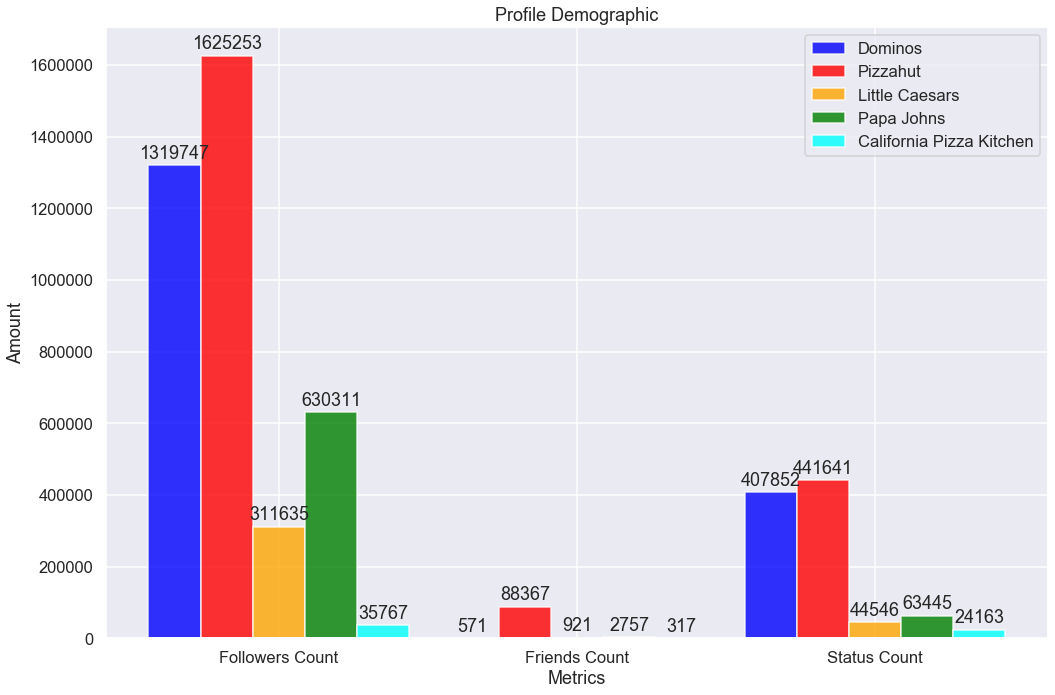

In [103]:
if __name__ == '__main__': 
    #import seaborn as sns #add styles to matplotlib graphs
    #sns.set(style='darkgrid', context='talk', palette='Dark2')
    
    fig, ax = plt.subplots(figsize=(15, 10))

    index = np.arange(0,6,2)
    bar_width = 0.35
    opacity = 0.8

    rects1 = ax.bar(index-(bar_width*2), dominos, bar_width, alpha=opacity, color='b', label='Dominos')       
    rects2 = ax.bar(index-bar_width, pizzahut, bar_width, alpha=opacity, color='r', label='Pizzahut')
    rects3 = ax.bar(index, lc, bar_width, alpha=opacity, color='orange', label='Little Caesars')
    rects4 = ax.bar(index+bar_width, pj, bar_width, alpha=opacity, color='g', label='Papa Johns')
    rects5 = ax.bar(index+(bar_width*2), cpk, bar_width, alpha=opacity, color='cyan', label='California Pizza Kitchen')

    plt.xlabel('Metrics')
    plt.ylabel('Amount')
    plt.title('Profile Demographic')
    plt.xticks(index, ('Followers Count', 'Friends Count', 'Status Count'))
    plt.legend()

    plt.tight_layout()
    autolabel_v(rects1)
    autolabel_v(rects2)
    autolabel_v(rects3)
    autolabel_v(rects4)
    autolabel_v(rects5)
    plt.show()

In [106]:
import urllib.parse

def get_replies(tweet):
    user = tweet['screen_name']
    tweet_id = tweet['id']
    replies_arr = []
    max_id = None
    #logging.info("looking for replies to: %s" % tweet_url(tweet))
    while True:
        q = urllib.parse.urlencode({"q": "to:%s" % user})
        try:
            replies = api.GetSearch(raw_query=q, since_id=tweet_id, max_id=max_id, count=100)
        except twitter.error.TwitterError as e:
            logging.error("caught twitter api error: %s", e)
            time.sleep(60)
            continue
            
        for reply in replies:
            #logging.info("examining: %s" % tweet_url(reply))
            if reply.in_reply_to_status_id == tweet_id:
                #logging.info("found reply: %s" % tweet_url(reply))
                #yield reply
                replies_arr.append(reply)
                # recursive magic to also get the replies to this reply
                for reply_to_reply in get_replies(reply):
                    #yield reply_to_reply
                    replies_arr.append(reply_to_reply)
            max_id = reply.id
        if len(replies) != 100:
            break
            
    return replies_arr

if __name__ == '__main__':
    #screen_name = "dominos" #note: if the user_timeline.json file does not exist, run getuserTimeline
    timeline_dominos = 'data/user_timeline_dominos_limit.json'
    
    with open(timeline_dominos) as f1, open('data/replies_dominos.csv', 'a', encoding="utf-8", newline = '') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['tweets', 'in_reply_to_id'])
        for line in f1:
            tweet = json.loads(line)
            replies = get_replies(tweet)
            for reply in replies:
                writer.writerow([reply['tweets'], reply['in_reply_to_status_id']])

KeyError: 'screen_name'

In [55]:
import sys
import json
from collections import Counter
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def get_mentions(tweet):
    entities = tweet.get('entities', {})
    mentions = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in mentions]

if __name__ == '__main__':
    #screen_name = "dominos" #note: if the user_timeline.json file does not exist, run getuserTimeline
    timeline_dominos = 'data/user_timeline_dominos_limit.json'
    timeline_lc = 'data/user_timeline_littlecaesars_limit.json'
    timeline_pj = 'data/user_timeline_papajohns_limit.json'
    timeline_cpk = 'data/user_timeline_calpizzakitchen_limit.json'
    timeline_pizzahut = 'data/user_timeline_pizzahut_limit.json'
    
    dominos = []
    pizzahut = []    
    lc = []
    pj = []
    cpk = []

    d_users = Counter()
    p_users = Counter()
    lc_users = Counter()
    pj_users = Counter()
    cpk_users = Counter()
    
    with open(timeline_dominos) as f1, open(timeline_pizzahut) as f2, open(timeline_lc) as f3, open(timeline_pj) as f4, open(timeline_cpk) as f5:
        print("Dominos")
        rt = 0
        fav = 0
        curfav = 0
        currt = 0
        mention = 0
        for line in f1:
            tweet = json.loads(line)
            if tweet['favorite_count'] != 0:
                curfav = tweet['favorite_count']
                fav = fav + curfav
            if tweet['retweet_count'] != 0:
                currt = tweet['retweet_count']
                rt = rt + currt
            mentions_in_tweet = get_mentions(tweet)
            d_users.update(mentions_in_tweet)
        for user, count in d_users.most_common():
            print("{}: {}".format(user, count))
            mention = mention + count
        
        dominos.append(mention)
        dominos.append(rt)
        dominos.append(fav)

        print("Pizzahut")
        rt = 0
        fav = 0
        curfav = 0
        currt = 0
        mention = 0
        for line in f2:
            tweet = json.loads(line)
            if tweet['favorite_count'] != 0:
                curfav = tweet['favorite_count']
                fav = fav + curfav
            if tweet['retweet_count'] != 0:
                currt = tweet['retweet_count']
                rt = rt + currt
            mentions_in_tweet = get_mentions(tweet)
            p_users.update(mentions_in_tweet)
        for user, count in p_users.most_common():
            print("{}: {}".format(user, count))
            mention = mention + count
        
        pizzahut.append(mention)
        pizzahut.append(rt)
        pizzahut.append(fav)
        
        print("Little Caesars")
        rt = 0
        fav = 0
        curfav = 0
        currt = 0
        mention = 0
        for line in f3:
            tweet = json.loads(line)
            if tweet['favorite_count'] != 0:
                curfav = tweet['favorite_count']
                fav = fav + curfav
            if tweet['retweet_count'] != 0:
                currt = tweet['retweet_count']
                rt = rt + currt
            mentions_in_tweet = get_mentions(tweet)
            lc_users.update(mentions_in_tweet)
        for user, count in lc_users.most_common():
            print("{}: {}".format(user, count))
            mention = mention + count
        
        lc.append(mention)
        lc.append(rt)
        lc.append(fav)
        
        print("Papa Johns")
        rt = 0
        fav = 0
        curfav = 0
        currt = 0
        mention = 0
        for line in f4:
            tweet = json.loads(line)
            if tweet['favorite_count'] != 0:
                curfav = tweet['favorite_count']
                fav = fav + curfav
            if tweet['retweet_count'] != 0:
                currt = tweet['retweet_count']
                rt = rt + currt
            mentions_in_tweet = get_mentions(tweet)
            pj_users.update(mentions_in_tweet)
        for user, count in pj_users.most_common():
            print("{}: {}".format(user, count))
            mention = mention + count
        
        pj.append(mention)
        pj.append(rt)
        pj.append(fav)
        
        print("California Pizza Kitchen")
        rt = 0
        fav = 0
        curfav = 0
        currt = 0
        mention = 0
        for line in f5:
            tweet = json.loads(line)
            if tweet['favorite_count'] != 0:
                curfav = tweet['favorite_count']
                fav = fav + curfav
            if tweet['retweet_count'] != 0:
                currt = tweet['retweet_count']
                rt = rt + currt
            mentions_in_tweet = get_mentions(tweet)
            cpk_users.update(mentions_in_tweet)
        for user, count in cpk_users.most_common():
            print("{}: {}".format(user, count))
            mention = mention + count
        
        cpk.append(mention)
        cpk.append(rt)
        cpk.append(fav)

        #print(dominos, pizzahut)

Dominos
dominos_india: 278
Dominos_UK: 208
DominosCanada: 31
Dominos_ROI: 8
Dominos_AU: 6
dominospizzanl: 6
JimsFirstborn: 3
yachicalon: 3
_402Drew: 3
DollarValued: 3
pizzahut: 3
ameskii84: 3
DominosSG: 2
Blaq__: 2
AwooCrewSevilla: 2
beccastokes: 2
Js_Har13: 2
CreatureHoarder: 2
JackOfCards22: 2
Bendun7: 2
james3332: 2
xKingluisxiii: 2
stacey_rising: 2
dominosng: 2
timh: 2
ADP4490: 2
kxylita: 2
exganjaqueen: 2
mlawson77: 2
fam_Denn: 2
Jewels2584: 2
BaddGirlCouture: 2
chaddorwart: 2
DominosDanmark: 2
eRome707: 2
D67894: 2
VIJITTYAGI9: 2
mewingwang: 2
emilylfosterrr: 2
EllieCasados: 2
xX_itsJrob: 2
RahulKu01615954: 2
JoyPodz: 2
vonlerie: 2
Rishi_Vasu: 2
davidmcmillan: 2
curtisisbooger: 2
TotalTeresaMove: 2
r3dMi5t420: 2
joshonthenet: 2
dannilizabethx: 2
Mark_Adrian9: 2
TechProDee: 2
RedBeneath: 2
sge_ultykaos: 2
Armandarizpain1: 2
meagynlyn: 2
PreetiBhatnaga1: 2
ShillinChi: 2
Lizzard899: 2
Jesse38218871: 2
StJude: 2
Ashish62350410: 2
ChocoChynaDoll: 2
jerry2290: 2
MansRaph: 2
ph4nt4sm4l:

_Faraz: 1
georgieharperr: 1
Nath15151: 1
original_sloan: 1
cakg4u: 1
b0ngripz: 1
stronhammer: 1
EllieMcardell: 1
J0kerrai: 1
Tim_Cochran: 1
dhna1217: 1
305godfadder: 1
_2real2raw_: 1
stephanieRcisco: 1
Kiesey78: 1
LO_Monaghan: 1
BenjiSourcream: 1
LailaLMartin1: 1
88sswanny: 1
itsjustchyy: 1
VictoryWaits: 1
AprilC_42: 1
007sabrinamarie: 1
RobReynolds: 1
zaydapuebla: 1
geenalia: 1
xkaraalove: 1
KaaylaaGerald: 1
ovoghost6: 1
ElectroKit10: 1
That1rpgdude: 1
adiosashley: 1
AsaelFreezing: 1
samforlyfe18: 1
maddiemarie173: 1
CatherineLloyd: 1
MrJeremyBranda: 1
taffiatales: 1
Grifsworld: 1
unspokingTruth: 1
alyakaabelis: 1
xxxtim: 1
___morgannicole: 1
notreguapo: 1
RJRonakJoshi: 1
magnetscholar: 1
bluemartian007: 1
Noodlebabeee: 1
collinspwife: 1
PastorKingB: 1
AmericanJudges: 1
Adriii_michelle: 1
LindsaySooy: 1
Akkie17495402: 1
Jordan_Fisher: 1
vinitrathod96: 1
Mollyoliviaa: 1
DopeMIGS: 1
eaglescouttrmpt: 1
thekhaldii: 1
RosieGar49: 1
JazzPlus4: 1
VishalG71732533: 1
brittbritt101: 1
vkvarun95

lounge_dawg: 1
i_M_dubBanga: 1
Toasty1458Lopez: 1
MeaganMock: 1
jeffglass32: 1
toosoapie: 1
JustinS66394988: 1
SFocus101: 1
Melii268: 1
crimsonjewel_sc: 1
PackfanPaul1208: 1
_LillyBug_: 1
livethelyrics: 1
Nathan_J_Zhao: 1
Gus_Banakis: 1
AJKlein09: 1
Ss_Jv: 1
super_star2424: 1
Tuonisisisisis: 1
MathewPiccioni: 1
MJ_Mac18: 1
jackyeclayton: 1
k0lax: 1
taylorkrunk: 1
Quebeccca: 1
marissamonotony: 1
__crystalized__: 1
SheilaHill: 1
aaronwatson86: 1
TechDeals_16: 1
TEWBUFF: 1
reynoldsa77: 1
LaurenHandleyTV: 1
JSumBeast13: 1
herbiehaase: 1
abbbby_xo: 1
KINGSIZERAWz: 1
kohlenblakesmom: 1
axlewar268: 1
Nomad_2414: 1
keelamartin: 1
Nicholoff: 1
unnlekevin: 1
BangurKanak: 1
Asapdrayy: 1
SynodicSpectre: 1
HFlying88: 1
Devyn947: 1
rebeccamaier444: 1
lizasarusrex: 1
RoyalPayneDiaz: 1
Lucasjhp: 1
RegKembo: 1
mtomaa_: 1
tncanter124: 1
Tawanna99259847: 1
curlytots2019: 1
kfear11: 1
VinayHadule: 1
cheggars20: 1
lshawbarry: 1
WonderWoman920: 1
WBaxtet: 1
DominicusHKG: 1
sakrebs04: 1
classactrachael: 1
pa

lucyleid: 1
mattcavazos94: 1
justinbelcher94: 1
jj_wearsprada: 1
BrandieLMT84: 1
twistedlemones: 1
written94: 1
Swampcritterz: 1
Disney_Swordy: 1
heBrandonJay: 1
DigidyDOGG: 1
WhitleyShayne: 1
GizelleMoney: 1
bradleySapp5: 1
MattMtz13: 1
Matthewwcalver1: 1
redbullgaming: 1
MobyDickay: 1
IceyJester88: 1
CharizardGame: 1
SKYLERTALKSSHIT: 1
ticketchick: 1
VictorianPrime: 1
DesperadoGods: 1
SmithBlast97: 1
stpatrickwv: 1
Wodie08: 1
andreaAcallahan: 1
KontrolOutta: 1
ADISDIX: 1
AnIrishAsian: 1
MacyGolder: 1
bridget_maruk: 1
RScorpious: 1
adeartist: 1
Radhika178: 1
HeyJessyPants: 1
Mariana02099650: 1
tortoile: 1
StephenHenson23: 1
jensvsthewrld: 1
HOMAGE: 1
StargazerStars: 1
gabriel_ar_610: 1
ChanseArringto3: 1
cres_eve_marie: 1
MutepfaMwaita: 1
onepieceoftape: 1
amanda_mariex3: 1
Feyl0rd: 1
MsJacks49176579: 1
Netty_096: 1
AngeliTheo: 1
jo5ie_3: 1
TaylorPowell10: 1
yannitheceo_: 1
JordyAMA: 1
BellisDoesBooks: 1
MaaPatraa: 1
BrownieHartz: 1
lauren_carterx: 1
1anky1u1u: 1
pattonhudella: 1
_kay

DannyGaydos: 1
Hazel_Eyez81: 1
bubbleschanog: 1
E_DA_MAN: 1
NHWeberWrites: 1
AngiGil6: 1
RealAndrewBaker: 1
moxie_moxxx: 1
RG_Madden: 1
thesue8: 1
laurrrrita: 1
FrogTurds: 1
superlightbulby: 1
ChinnySaid: 1
bmgarza74: 1
WebMasterBK: 1
joysoftechnolog: 1
Gvddesttt: 1
R_Locke2501: 1
ambalynne4201: 1
Pug_Luck: 1
MouseyRawR: 1
__amberguesa: 1
Brandon_Devin: 1
MattMcCorry2671: 1
fols_laura: 1
poneill77: 1
jenny05kaybe: 1
itsurgirlizzie: 1
tonievangelist1: 1
wmwbeehead: 1
Newtberry: 1
D20Rae: 1
Chloepirruccel1: 1
kaitlyn_brannon: 1
CollierAcollier: 1
wwjmiddays: 1
paigetreerolla: 1
Leylz719: 1
Elmomcd: 1
Debra62154769: 1
danielrivera105: 1
rockhuk: 1
brisha__: 1
Aimee_girl: 1
AmyClaireBlaker: 1
JeannineOnTheGo: 1
DharmaAbrahart: 1
apittame: 1
chea_zevnick: 1
jeridgas: 1
mellamojoell: 1
sstewartPR: 1
aaron_wallick: 1
DonCorzo: 1
sharipotts91: 1
freshkidgamer: 1
SmartAssJen: 1
IAmLegendToo: 1
allison_hatcher: 1
ComptonFamilia: 1
Weapon_meX: 1
fordthethird: 1
SchofieldYXC: 1
jasontoddsmut: 1
si

_JustPeachyInGA: 1
AkaDuckie: 1
mrsmbjones: 1
MeganMjw: 1
HollyyEmily: 1
GoldieLFC23: 1
taekook80210522: 1
JoshuaB19758325: 1
lm_grand: 1
cypresshill: 1
ThePandaPunch: 1
DisortedFreak: 1
PatMcAfeeShow: 1
markellinwood: 1
birb_mother: 1
Royal_Parris: 1
heycharmy: 1
nikkiangeliqve: 1
_BrandiJanelle: 1
_annamelissa_: 1
captaintoshiro9: 1
themost_extra: 1
TeeJaxOff: 1
Lvpinkprincessa: 1
thenewspatrick: 1
Realbunny1145: 1
movieguy11a: 1
GRobb45: 1
jordisp3: 1
tesh901: 1
BigWilks23: 1
blackmarketwit: 1
BooGotDaJuice: 1
kurbusmaximus: 1
melissa_aidaxo: 1
hellabeautyy: 1
JinglesJoy1: 1
Ponder_onThis: 1
jenxsi: 1
A_Ward617: 1
ScottyStyles29: 1
ColtonRobbins2: 1
liam15598902: 1
xXx_jalenk_xXx: 1
Soaryn117: 1
nick_enos93: 1
Ciielox3: 1
barajasashley27: 1
iammyaaaaaaa: 1
IamBrittanyJay: 1
Kocainebarbi3: 1
_TiinkMontanna: 1
Montagob: 1
theins8mniac: 1
Natalie83119443: 1
sistagal2: 1
NerdTalk87: 1
SanibelChaddy: 1
Entico19: 1
RiahhB: 1
Kels757: 1
FritoCrash: 1
jaexrenee: 1
tgoyal698: 1
Barahona73: 1

charley_ck14: 1
pahispoika: 1
owlsfan954: 1
kevkevlow85: 1
PeggySueO1: 1
tifflove21: 1
Condesa1: 1
BadWolfSaenz: 1
MarieMunsterful: 1
DrexelFJoe: 1
sukiestrada: 1
iloveearmins: 1
LonnieLongino: 1
juanita_amors: 1
otaku_old: 1
SleepyCT: 1
OwCharlee: 1
WilliamLavant: 1
AlexisJay611: 1
bodybingster: 1
mrstroncoso14: 1
coolmario88cp: 1
TheBrownBombr87: 1
groony1: 1
Jack14927768: 1
__slump__: 1
DaQueenKeke: 1
pwluvsCBJnBacon: 1
iamjaejoc: 1
slow_whitehatch: 1
DukeTheHalls: 1
okayjazzi: 1
live_laugh_YEET: 1
BrandonR24: 1
Sajj_: 1
Dougilis: 1
Questfor50: 1
ChampMarage: 1
coomgus: 1
Trzupek82: 1
iVanessaVazquez: 1
ajee_marie: 1
Zimm804: 1
jmhilder: 1
crimsonmask49: 1
jeremyrat47: 1
shepherd_b0y: 1
matzimazing: 1
BrianHoaglin: 1
LordCozymoto: 1
BeesThoughts1: 1
maxkringen: 1
Mikayla70258379: 1
zwells11: 1
toniiid10: 1
jsmendizzle: 1
BlueGamingWolf: 1
SubtweetSundays: 1
AustinDeSpain: 1
loki478: 1
jasen_lesieur80: 1
GMunny: 1
The_Grand_Tapia: 1
ItsAbelJr: 1
tb13_2001: 1
JordannClements: 1
Tru_Ha

Dawn__Renee: 63
luv_mydachshund: 45
minecraft_papa: 36
MissyMomOfTwo: 33
_decayiing: 32
toomuch4ne1: 28
Tina_Hurban: 22
a93_mal: 20
nunley_tammy: 19
JillBostonGirl: 18
moore_nichole: 15
DaintyMae2: 15
andrewbishup: 14
DaveT_Burns: 11
katiemclain: 10
vickidoll90: 10
stephrollman: 9
ifndef_define: 9
screamtesha: 9
jmarksinclair: 9
senojh1111: 9
MGS_PWN3R: 8
JaimeHoney01: 8
LoriLeal1: 8
DaManciniBros: 8
alecsander316: 8
sarachaudhry68: 8
ellenrose1969: 8
Anonymo31850070: 7
brown_spearslab: 7
AlainOkay: 7
chintan5566: 7
BucioVanessa: 7
xdjordybx: 6
SHAQ: 6
CheesecakeHey: 6
mberwebb: 6
ShaqsFunHouse: 6
CallMeAcme: 6
Alexiathewolf1: 6
CollierAcollier: 6
women2322: 6
amehrich820: 6
KimberliLarae: 6
Dr_Vulpine: 6
ddruquet: 6
_N00dl3z: 6
HitscanFN: 6
ASchallenberger: 6
Brandy13Mom: 6
jhshifris11: 5
BaileyGoat_: 5
Jim_L_Miller: 5
PapaJohnsUK: 5
anfoeg: 5
juanbebegato: 5
Bloopkin: 5
OkBoomerkin: 5
krystina1459: 5
Gengarsprodigy: 5
_LillieAnnSueee: 5
Kyulightning1: 5
TheGiantPie: 5
Ross_McKinney: 

WesPikeRealtor: 1
johnahesch: 1
trooper6nine: 1
KinchenGolf: 1
a_daiagar: 1
x_dysha: 1
marissatupai: 1
Tyler_sesh666: 1
BrittRambo: 1
goddessruby1998: 1
xgreeneyeddoll: 1
blondieemarie: 1
nishnishxo_: 1
LobstahB: 1
Jo91682588: 1
kuelade: 1
ToxicityBrolyz: 1
knitted_reality: 1
stephani_ann916: 1
borker_silA: 1
DenitriaBell: 1
robm8893: 1
RandomIdiotOn: 1
cc_rayne: 1
pureblysssss: 1
aligemaree: 1
Peeta_buttaa: 1
DbDMemes: 1
aileenlavin__: 1
Snevky: 1
NoBait_Book: 1
_foxylexi_: 1
12starveronica: 1
JuliePettie: 1
SihxRings: 1
Shortie2you: 1
MBG81414: 1
Emene12: 1
EdwinCadizJr: 1
BSC_Consulting: 1
AllForNevada: 1
d_rae77: 1
Carmel_Police: 1
MAVferneau: 1
sindows98: 1
MF92265823: 1
AjayKing215: 1
caligrl867: 1
Knightw0lf_: 1
tina_lindsey229: 1
MrCheesesteakXX: 1
pleaseguardup23: 1
MikkiCherry48: 1
GabeDiaz4: 1
6969_6969696969: 1
KSaindore: 1
Xxmanny462xX: 1
southOCgal: 1
gamerwgunsohmy: 1
PrettyGalNini: 1
thecapitalv: 1
jjallenn: 1
YardTime: 1
JaredGreer10: 1
sethdgoodwin: 1
GoddessElectro: 

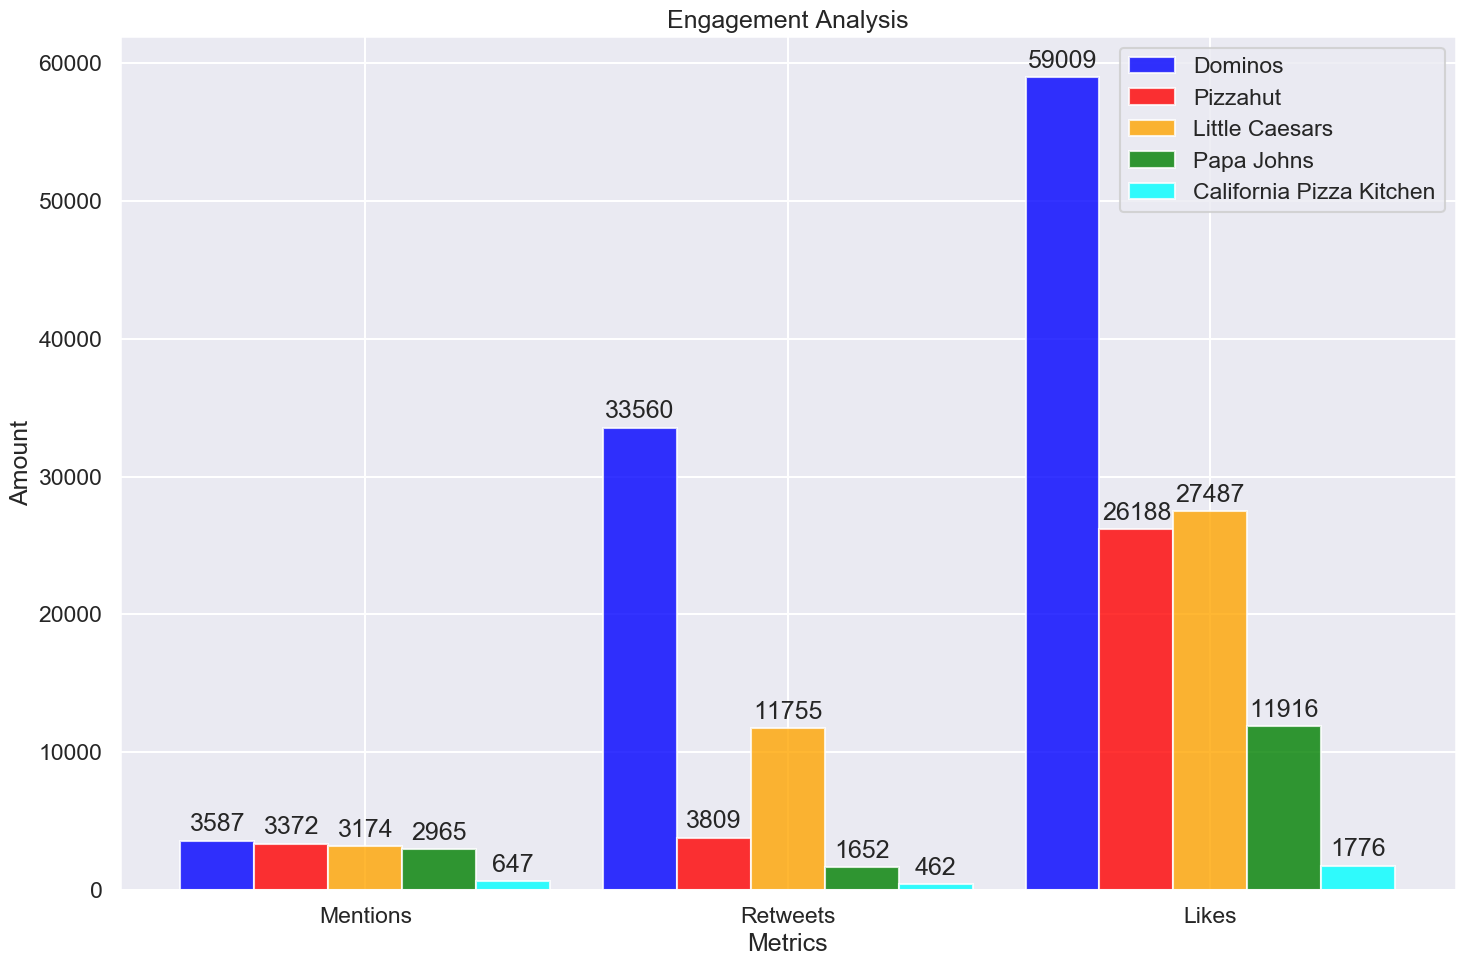

In [56]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        plt.annotate('{}'.format(width), xy=(width, yloc), xytext=(3, 0),
                            textcoords="offset points",
                            ha='left', va='center',
                            color='black', clip_on=True)

def autolabel_v(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

if __name__ == '__main__': 
    import seaborn as sns #add styles to matplotlib graphs
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    
    fig, ax = plt.subplots(figsize=(15, 10))

    index = np.arange(0,6,2)
    bar_width = 0.35
    opacity = 0.8

    rects1 = ax.bar(index-(bar_width*2), dominos, bar_width, alpha=opacity, color='b', label='Dominos')       
    rects2 = ax.bar(index-bar_width, pizzahut, bar_width, alpha=opacity, color='r', label='Pizzahut')
    rects3 = ax.bar(index, lc, bar_width, alpha=opacity, color='orange', label='Little Caesars')
    rects4 = ax.bar(index+bar_width, pj, bar_width, alpha=opacity, color='g', label='Papa Johns')
    rects5 = ax.bar(index+(bar_width*2), cpk, bar_width, alpha=opacity, color='cyan', label='California Pizza Kitchen')

    plt.xlabel('Metrics')
    plt.ylabel('Amount')
    plt.title('Engagement Analysis')
    plt.xticks(index, ('Mentions', 'Retweets', 'Likes'))
    plt.legend()

    plt.tight_layout()
    autolabel_v(rects1)
    autolabel_v(rects2)
    autolabel_v(rects3)
    autolabel_v(rects4)
    autolabel_v(rects5)
    plt.show()

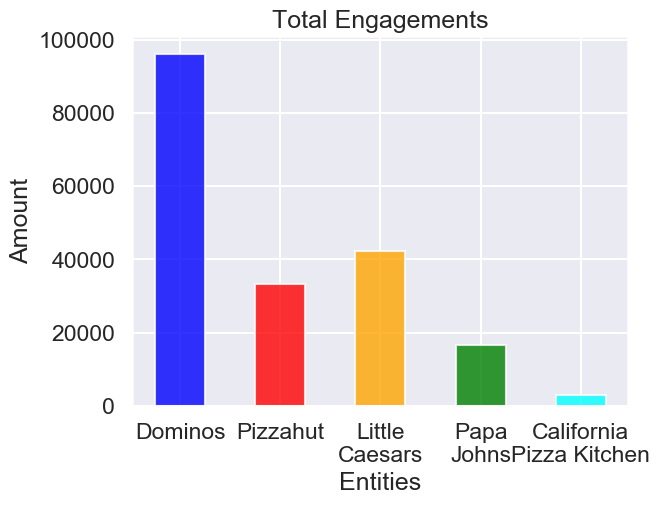

In [67]:
### ENGAGEMENTS ###
eng_dominos = dominos[0] + dominos[1] + dominos[2]
eng_pizzahut = pizzahut[0] + pizzahut[1] + pizzahut[2]
eng_lc = lc[0] + lc[1] + lc[2]
eng_pj = pj[0] + pj[1] + pj[2]
eng_cpk = cpk[0] + cpk[1] + cpk[2]
eng = [eng_dominos, eng_pizzahut, eng_lc, eng_pj, eng_cpk]

rects1 = plt.bar(np.arange(0,10,2), eng, 1.0, alpha=opacity, color=['b','r', 'orange','g','cyan'])       
#rects2 = plt.bar(index+bar_width, eng_pizzahut, bar_width, alpha=opacity, color='r', label='PizzahutMsia')

plt.xlabel('Entities')
plt.ylabel('Amount')
plt.title('Total Engagements')
plt.xticks(np.arange(0,10,2), ('Dominos', 'Pizzahut', 'Little\nCaesars', 'Papa\nJohns', 'California\nPizza Kitchen'))
plt.show()

In [77]:
import csv

timeline = 'data/user_timeline_calpizzakitchen_limit.json'
#f_csv = 'data/user_timeline_dominos.csv'

with open(timeline) as f_timeline, open('data/user_timeline_calpizzakitchen.csv', 'a', encoding="utf-8", newline = '') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['tweets', 'created_at'])
    for line in f_timeline:
        tweet = json.loads(line)
        writer.writerow([tweet['full_text'], tweet['created_at']])

In [160]:
import tweepy
import csv 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/littlecaesars.csv')

# Keeping only the neccessary columns
data = data[['tweets']]
display(data.head(10))

,tweets
0,@GavinForrest46 Hi Gavin. We've responded to y...
1,@littlecaesars knew it was dirty but not this ...
2,@moefakih_2 @just2nic3 @littlecaesars LMFAOOOO
3,@moefakih_2 @just2nic3 @littlecaesars LMFAOOOOOOO
4,@just2nic3 Waiting is never fun and you should...
5,@just2nic3 @littlecaesars Its little ceasers g...
6,Little ceasers has me waiting for longer than ...
7,@KateConrey @littlecaesars https://t.co/VrL9mh...
8,@TroyConley14 @littlecaesars Not yet - I'm jus...
9,@EverydayBastiat @littlecaesars The fact that ...


In [125]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|([RT]+)|(https?://[A-Za-z0-9./]+)|(@[A-Z0-9a-z_:]+)|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [161]:
# We create a column with the result of the analysis:
data['label'] = np.array([analyze_sentiment(tweet) for tweet in data['tweets']])

# We display the updated dataframe with the new column:
display(data.head(10))

,tweets,label
0,@GavinForrest46 Hi Gavin. We've responded to y...,0
1,@littlecaesars knew it was dirty but not this ...,-1
2,@moefakih_2 @just2nic3 @littlecaesars LMFAOOOO,0
3,@moefakih_2 @just2nic3 @littlecaesars LMFAOOOOOOO,0
4,@just2nic3 Waiting is never fun and you should...,-1
5,@just2nic3 @littlecaesars Its little ceasers g...,-1
6,Little ceasers has me waiting for longer than ...,-1
7,@KateConrey @littlecaesars https://t.co/VrL9mh...,0
8,@TroyConley14 @littlecaesars Not yet - I'm jus...,0
9,@EverydayBastiat @littlecaesars The fact that ...,1


In [170]:
#df2 = pd.read_csv('data/pizza.csv')
df2 = data[['tweets', 'label']]
#df2['Translate_tweet'] = df2['tweets'].apply(lambda x: translate(x))
df2.head(10)
#print(trans)
#df2.to_csv('twitter_new_label.csv', mode='a', encoding='utf-8', index=False)

,tweets,label
0,@GavinForrest46 Hi Gavin. We've responded to y...,0
1,@littlecaesars knew it was dirty but not this ...,-1
2,@moefakih_2 @just2nic3 @littlecaesars LMFAOOOO,0
3,@moefakih_2 @just2nic3 @littlecaesars LMFAOOOOOOO,0
4,@just2nic3 Waiting is never fun and you should...,-1
5,@just2nic3 @littlecaesars Its little ceasers g...,-1
6,Little ceasers has me waiting for longer than ...,-1
7,@KateConrey @littlecaesars https://t.co/VrL9mh...,0
8,@TroyConley14 @littlecaesars Not yet - I'm jus...,0
9,@EverydayBastiat @littlecaesars The fact that ...,1


In [163]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['label'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['label'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['label'][index] < 0]

In [164]:
from pprint import pprint #pretty-print json

#printing pos and neg headlines

print("Positive tweets:\n")
pprint(list(data[data['label'] == 1].tweets)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(data[data['label'] == -1].tweets)[:5], width=200)

Positive tweets:

['@EverydayBastiat @littlecaesars The fact that a wealthy corporate attorney can praise Little Caesars, and the fact that the billionaire President of the United States favorite food is McDonalds, '
 'is a true testimate to how Capitalism can truly bring everyone together.',
 '@littlecaesars Dwight Schrute is the CEO Of Sliced Bread confirmed',
 '🍕Here\'s the @littlecaesars  Delivery of the Game - Trey Davis hits Jaysean Paige from the sidelines! ➡️That dunk was "Better Than Sliced Bread!"\r\n'
 '#LittleCaesarsDelivers - Order yours today via @DoorDash #CrustaceanNation https://t.co/phuafGNu0S',
 'Which pizza should I eat tonight @dominos @PapaJohns @papamurphys @pizzahut @godfatherspizza @littlecaesars when I listen to old @LionelRichie cassettes.',
 '@OGPizzaKing @littlecaesars @PapaJohns Best pizza out there!  Yummmmm.']

Negative headlines:

['@littlecaesars knew it was dirty but not this dirty https://t.co/3zQXm1VYAC',
 "@just2nic3 Waiting is never fun and you sh

In [165]:
#count
print(df2.label.value_counts())
print("\n")

#percentage
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweets'])))

 0    996
 1    683
-1    381
Name: label, dtype: int64


Percentage of positive tweets: 33.15533980582524%
Percentage of neutral tweets: 48.349514563106794%
Percentage of negative tweets: 18.49514563106796%


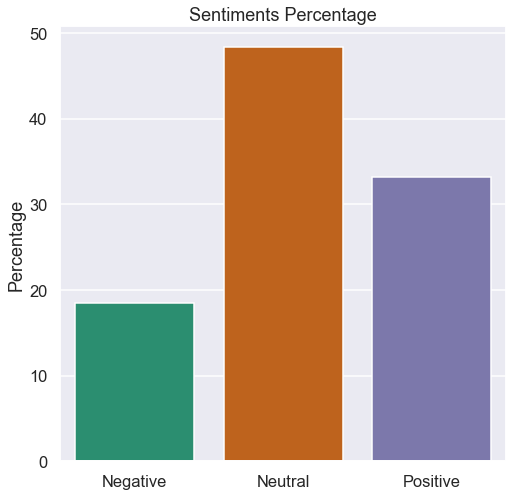

In [166]:
import seaborn as sns #add styles to matplotlib graphs
sns.set(style='darkgrid', context='talk', palette='Dark2')


fig, ax = plt.subplots(figsize=(8, 8))

counts = df2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_title('Sentiments Percentage')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [132]:
import string

string.punctuation

def remove_punct(tweet):
    tweet  = "".join([char for char in tweet if char not in string.punctuation])
    tweet = re.sub('[0-9]+', '', tweet)
    return tweet

df2['Tweet_punct'] = df2['tweets'].apply(lambda x: remove_punct(x))
df2.head(10)

,tweets,label,Tweet_punct
0,Honored to be part of @dominos' customer exper...,0,Honored to be part of dominos customer experie...
1,@Official_STFC @Dominos_UK Don Rogers stand. R...,0,OfficialSTFC DominosUK Don Rogers stand Row A
2,"I'm in my PJs, about to pour myself a gin, Dom...",1,Im in my PJs about to pour myself a gin Domino...
3,@Lafacia @Dominos_UK Any good?,1,Lafacia DominosUK Any good
4,That's empathetic service from leading brand @...,0,Thats empathetic service from leading brand do...
5,I opened door expecting to see the amazon guy ...,-1,I opened door expecting to see the amazon guy ...
6,How do I get offers on dominos ?,1,How do I get offers on dominos
7,Pizza Plug Open🍕\r\n\r\n$10 for $60\r\n$12 for...,1,Pizza Plug Open🍕\r\n\r\n for \r\n for \r\n for...
8,@baylissrally @Dominos_UK Very rarely use them...,1,baylissrally DominosUK Very rarely use them an...
9,@k1LL3rX_AT Tasty!...and how about some of #Al...,0,kLLrXAT Tastyand how about some of AlitaBattle...


In [133]:
def tokenization(tweet):
    tweet = re.split('\W+', tweet)
    return tweet

df2['Tweet_tokenized'] = df2['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df2.head(10)

,tweets,label,Tweet_punct,Tweet_tokenized
0,Honored to be part of @dominos' customer exper...,0,Honored to be part of dominos customer experie...,"[honored, to, be, part, of, dominos, customer,..."
1,@Official_STFC @Dominos_UK Don Rogers stand. R...,0,OfficialSTFC DominosUK Don Rogers stand Row A,"[officialstfc, dominosuk, don, rogers, stand, ..."
2,"I'm in my PJs, about to pour myself a gin, Dom...",1,Im in my PJs about to pour myself a gin Domino...,"[im, in, my, pjs, about, to, pour, myself, a, ..."
3,@Lafacia @Dominos_UK Any good?,1,Lafacia DominosUK Any good,"[lafacia, dominosuk, any, good]"
4,That's empathetic service from leading brand @...,0,Thats empathetic service from leading brand do...,"[thats, empathetic, service, from, leading, br..."
5,I opened door expecting to see the amazon guy ...,-1,I opened door expecting to see the amazon guy ...,"[i, opened, door, expecting, to, see, the, ama..."
6,How do I get offers on dominos ?,1,How do I get offers on dominos,"[how, do, i, get, offers, on, dominos, ]"
7,Pizza Plug Open🍕\r\n\r\n$10 for $60\r\n$12 for...,1,Pizza Plug Open🍕\r\n\r\n for \r\n for \r\n for...,"[pizza, plug, open, for, for, for, free, desse..."
8,@baylissrally @Dominos_UK Very rarely use them...,1,baylissrally DominosUK Very rarely use them an...,"[baylissrally, dominosuk, very, rarely, use, t..."
9,@k1LL3rX_AT Tasty!...and how about some of #Al...,0,kLLrXAT Tastyand how about some of AlitaBattle...,"[kllrxat, tastyand, how, about, some, of, alit..."


In [134]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [135]:
stopword = stopwords.words('english') + stopwords.words('french') + stopwords.words('italian')
stopword.extend(['x', 'xf', 'xe', 'b', 'rt', 'xa', 'n', 'https', 'co', 'xb', 'xd', 'xs', 'lc', 'xef', 'xc', 'xec', 'amp',
                 'xt', 'xad', 'xab', 'xeb', 'nhttps', 'know', 'one', 'really', 'xed', 'got', 'us', 'get', 'th','xba', 'xae',
                 'xm', 'still', 'af', 'tbt', 'w', 'ya', 'go'])

In [136]:
def remove_stopwords(tweet):
    tweet = [word for word in tweet if word not in stopword]
    return tweet
    
df2['Tweet_nonstop'] = df2['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df2.head(10)

,tweets,label,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,Honored to be part of @dominos' customer exper...,0,Honored to be part of dominos customer experie...,"[honored, to, be, part, of, dominos, customer,...","[honored, part, dominos, customer, experience,..."
1,@Official_STFC @Dominos_UK Don Rogers stand. R...,0,OfficialSTFC DominosUK Don Rogers stand Row A,"[officialstfc, dominosuk, don, rogers, stand, ...","[officialstfc, dominosuk, rogers, stand, row, ]"
2,"I'm in my PJs, about to pour myself a gin, Dom...",1,Im in my PJs about to pour myself a gin Domino...,"[im, in, my, pjs, about, to, pour, myself, a, ...","[im, pjs, gin, dominos, way, start, love, blin..."
3,@Lafacia @Dominos_UK Any good?,1,Lafacia DominosUK Any good,"[lafacia, dominosuk, any, good]","[lafacia, dominosuk, good]"
4,That's empathetic service from leading brand @...,0,Thats empathetic service from leading brand do...,"[thats, empathetic, service, from, leading, br...","[thats, empathetic, service, leading, brand, d..."
5,I opened door expecting to see the amazon guy ...,-1,I opened door expecting to see the amazon guy ...,"[i, opened, door, expecting, to, see, the, ama...","[opened, door, expecting, see, amazon, guy, tu..."
6,How do I get offers on dominos ?,1,How do I get offers on dominos,"[how, do, i, get, offers, on, dominos, ]","[offers, dominos, ]"
7,Pizza Plug Open🍕\r\n\r\n$10 for $60\r\n$12 for...,1,Pizza Plug Open🍕\r\n\r\n for \r\n for \r\n for...,"[pizza, plug, open, for, for, for, free, desse...","[pizza, plug, open, free, dessert, dominos, or..."
8,@baylissrally @Dominos_UK Very rarely use them...,1,baylissrally DominosUK Very rarely use them an...,"[baylissrally, dominosuk, very, rarely, use, t...","[baylissrally, dominosuk, rarely, use, exact, ..."
9,@k1LL3rX_AT Tasty!...and how about some of #Al...,0,kLLrXAT Tastyand how about some of AlitaBattle...,"[kllrxat, tastyand, how, about, some, of, alit...","[kllrxat, tastyand, alitabattleangels, fav, de..."


In [137]:
def clean_text(tweet):
    text_lc = "".join([word.lower() for word in tweet if word not in string.punctuation]) 
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)  
    tweet = [word.lower() for word in tokens if word.lower() not in stopword] 
    return tweet

In [167]:
#grab all of the positive label headlines from our dataframe
#FreqDist function - to get the most common words in the positive headlines

pos_lines = list(df2[df2.label == 1].tweets)

pos_tokens = clean_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(50)

[('littlecaesars', 534),
 ('pizza', 232),
 ('make', 64),
 ('like', 64),
 ('thank', 63),
 ('dominos', 60),
 ('love', 58),
 ('hot', 52),
 ('please', 52),
 ('little', 51),
 ('pizzahut', 51),
 ('right', 51),
 ('customer', 50),
 ('ready', 49),
 ('details', 49),
 ('good', 48),
 ('better', 47),
 ('care', 46),
 ('bread', 44),
 ('form', 44),
 ('team', 43),
 ('order', 41),
 ('delivery', 38),
 ('papajohns', 38),
 ('caesars', 37),
 ('share', 37),
 ('sure', 37),
 ('via', 36),
 ('thanks', 34),
 ('time', 34),
 ('would', 33),
 ('great', 33),
 ('best', 32),
 ('lol', 32),
 ('want', 32),
 ('send', 30),
 ('cheese', 29),
 ('oh', 29),
 ('hey', 28),
 ('look', 26),
 ('happy', 26),
 ('gdxhgsiyp', 25),
 ('day', 24),
 ('hi', 24),
 ('ogpizzaking', 23),
 ('store', 23),
 ('hobockryan', 22),
 ('macguyvermedia', 22),
 ('dm', 21),
 ('much', 21)]

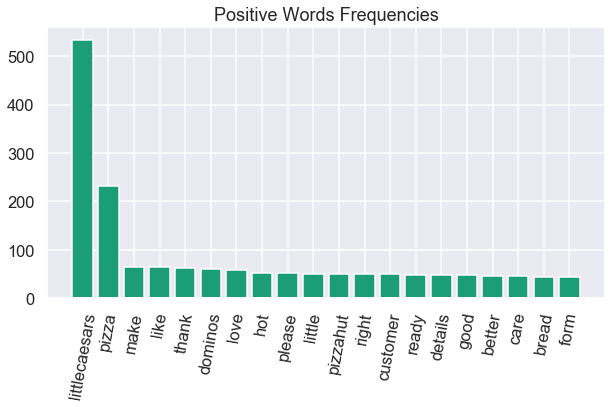

In [168]:
y = [count for df2, count in pos_freq.most_common(20)]
terms = [t[0] for t in pos_freq.most_common(20)]
   
x = range(1, len(y)+1)
x_label = terms

plt.figure(figsize=(10,5))
plt.title('Positive Words Frequencies')
plt.bar(x, y, align='center')
plt.xticks(x,x_label,rotation =80)
plt.show()

littlecaesars: 534
pizza: 232
make: 64
like: 64
thank: 63
dominos: 60
love: 58
hot: 52
please: 52
little: 51
pizzahut: 51
right: 51
customer: 50
ready: 49
details: 49
good: 48
better: 47
care: 46
bread: 44
form: 44
team: 43
order: 41
delivery: 38
papajohns: 38
caesars: 37
share: 37
sure: 37
via: 36
thanks: 34
time: 34
would: 33
great: 33
best: 32
lol: 32
want: 32
send: 30
cheese: 29
oh: 29
hey: 28
look: 26
happy: 26
gdxhgsiyp: 25
day: 24
hi: 24
ogpizzaking: 23
store: 23
hobockryan: 22
macguyvermedia: 22
dm: 21
much: 21


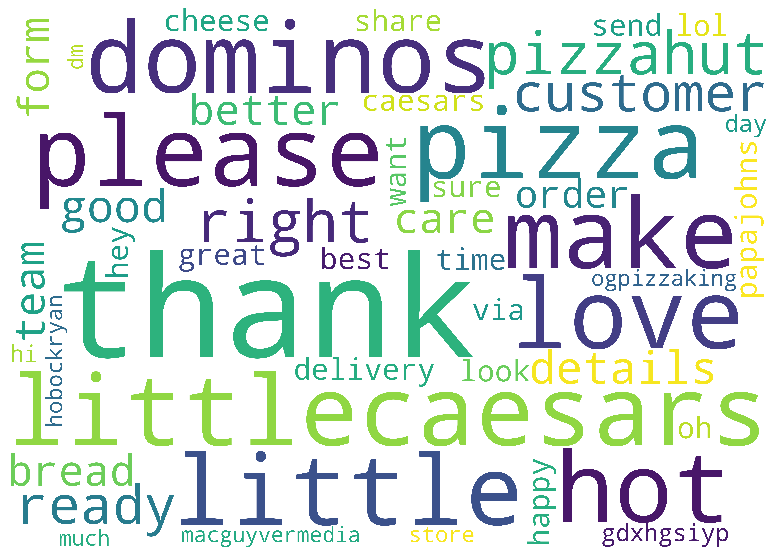

In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

one = ""
    
for df2, count in pos_freq.most_common(50):
    print("{}: {}".format(df2, count))
    one = one + " "+ df2
    
wordcloud1 = WordCloud(background_color='white', width=7000, height=5000).generate(one)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

In [ ]:
#df2 = pd.read_csv('data/pizza.csv')
df2 = data[['tweets', 'label']]
#df2['Translate_tweet'] = df2['tweets'].apply(lambda x: translate(x))
df2.head(10)
#print(trans)
#df2.to_csv('twitter_new_label.csv', mode='a', encoding='utf-8', index=False)

In [171]:
#FreqDist function - to get the most common words in the negative headlines

neg_lines = list(df2[df2.label == -1].tweets)

neg_tokens = clean_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(50)

[('littlecaesars', 311),
 ('pizza', 142),
 ('little', 80),
 ('caesars', 45),
 ('team', 44),
 ('man', 43),
 ('bread', 43),
 ('crazy', 43),
 ('order', 39),
 ('black', 38),
 ('look', 36),
 ('st', 36),
 ('sorry', 35),
 ('make', 34),
 ('customer', 32),
 ('let', 32),
 ('like', 31),
 ('deliver', 30),
 ('time', 30),
 ('details', 28),
 ('never', 27),
 ('care', 26),
 ('form', 24),
 ('ever', 24),
 ('share', 24),
 ('crust', 24),
 ('want', 23),
 ('via', 23),
 ('dominos', 23),
 ('also', 22),
 ('delivery', 22),
 ('wrong', 22),
 ('would', 21),
 ('please', 21),
 ('fun', 20),
 ('fact', 19),
 ('person', 19),
 ('tell', 19),
 ('story', 19),
 ('happened', 18),
 ('back', 18),
 ('history', 18),
 ('meet', 18),
 ('rekkhan', 18),
 ('anyone', 18),
 ('different', 18),
 ('read', 18),
 ('hear', 18),
 ('caesar', 18),
 ('fuck', 17)]

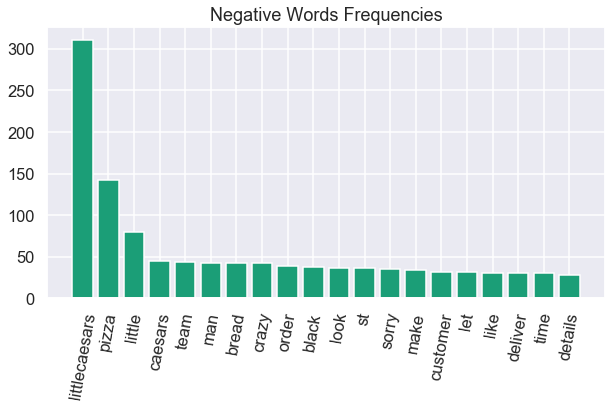

In [172]:
y = [count for df2, count in neg_freq.most_common(20)]
terms = [t[0] for t in neg_freq.most_common(20)]
   
x = range(1, len(y)+1)
x_label = terms

plt.figure(figsize=(10,5))
plt.title('Negative Words Frequencies')
plt.bar(x, y, align='center')
plt.xticks(x,x_label,rotation =80)
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

two = ""
    
for df2, count in neg_freq.most_common(50):
    print("{}: {}".format(df2, count))
    two = two + " "+ df2
    
wordcloud2 = WordCloud(background_color='white', width=7000, height=5000).generate(two)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

littlecaesars: 311
pizza: 142
little: 80
caesars: 45
team: 44
man: 43
bread: 43
crazy: 43
order: 39
black: 38
look: 36
st: 36
sorry: 35
make: 34
customer: 32
let: 32
like: 31
deliver: 30
time: 30
details: 28
never: 27
care: 26
form: 24
ever: 24
share: 24
crust: 24
want: 23
via: 23
dominos: 23
also: 22
delivery: 22
wrong: 22
would: 21
please: 21
fun: 20
fact: 19
person: 19
tell: 19
story: 19
happened: 18
back: 18
history: 18
meet: 18
rekkhan: 18
anyone: 18
different: 18
read: 18
hear: 18
caesar: 18
fuck: 17
